In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
# 支持中文显示
mpl.rcParams['font.sans-serif'] = ['STFangsong']
mpl.rcParams['axes.unicode_minus'] = False

# 简单柱状图

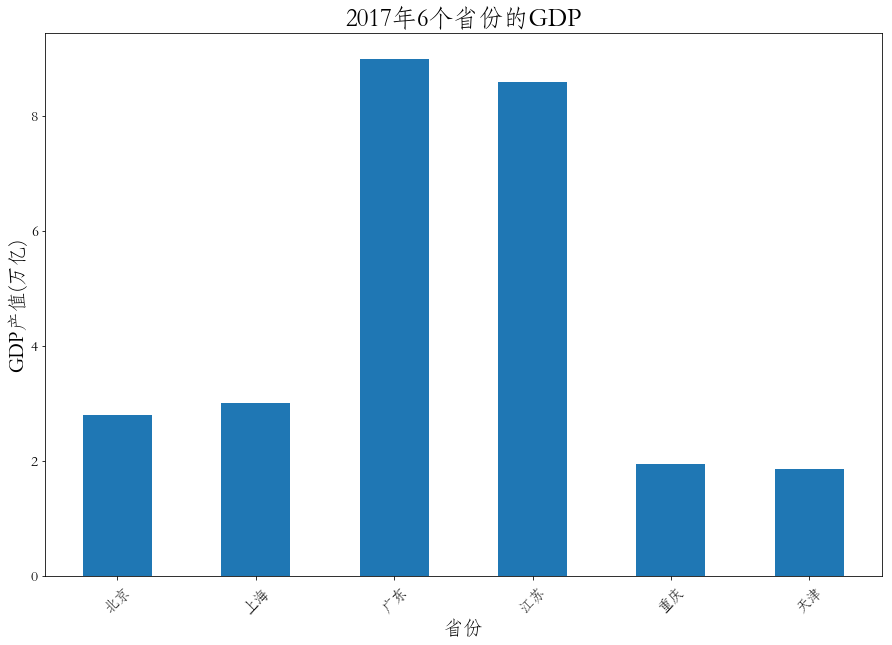

In [2]:
GDP = pd.read_excel('Province GDP 2017.xlsx')
fig, ax = plt.subplots(figsize=(15,10)) #创建一个绘图对象
ax.bar(GDP.index.values,GDP.GDP,0.5) #0.5代表柱状的宽度
ax.set_xticks(GDP.index.values) #位置
ax.set_xticklabels(GDP.Province,rotation = 45) #给每个位置一个具体的标签
plt.xticks(fontsize=15 )
plt.yticks(fontsize=15)
ax.set_xlabel('省份',fontsize = 20)
ax.set_ylabel('GDP产值(万亿)',fontsize = 20)
ax.set_title('2017年6个省份的GDP',fontsize = 25)
plt.show()

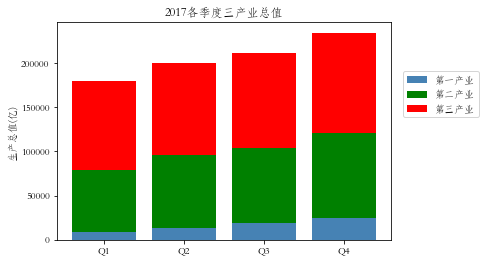

In [3]:
# # # 堆叠图
industry_GDP = pd.read_excel('Industry_GDP.xlsx')
temp = pd.crosstab(industry_GDP['Quarter'],industry_GDP['Industry_Type'],values=industry_GDP['GDP'],aggfunc=np.sum)
plt.bar(x= temp.index.values,height= temp['第一产业'],color='steelblue',label='第一产业',tick_label = temp.index.values)
plt.bar(x= temp.index.values,height= temp['第二产业'],bottom =temp['第一产业'], color='green',label='第二产业',
        tick_label = temp.index.values)
plt.bar(x= temp.index.values,height = temp['第三产业'],bottom =temp['第一产业'] +  temp['第二产业'],color='red',label='第三产业',
        tick_label = temp.index.values)
plt.ylabel('生产总值(亿)')
plt.title('2017各季度三产业总值')
plt.legend(loc=2, bbox_to_anchor=(1.02,0.8)) #图例显示在外面
plt.show()

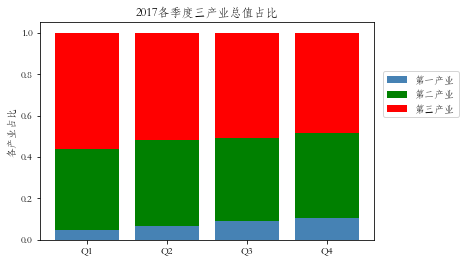

In [4]:
# # # 堆叠图占比
temp = pd.crosstab(industry_GDP['Quarter'],industry_GDP['Industry_Type'],values=industry_GDP['GDP'],aggfunc=np.sum)
temp = temp.div(temp.sum(1).astype(float), axis=0)

plt.bar(x= temp.index.values,height= temp['第一产业'],color='steelblue',label='第一产业',tick_label = temp.index.values)
plt.bar(x= temp.index.values,height= temp['第二产业'],bottom =temp['第一产业'], color='green',label='第二产业',
        tick_label = temp.index.values)
plt.bar(x= temp.index.values,height = temp['第三产业'],bottom =temp['第一产业'] +  temp['第二产业'],color='red',label='第三产业',
        tick_label = temp.index.values)
plt.ylabel('各产业占比')
plt.title('2017各季度三产业总值占比')
plt.legend(loc = 2,bbox_to_anchor=(1.01,0.8))
plt.show()

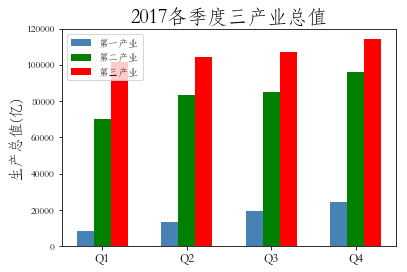

In [5]:
# # # 垂直交错条形图
temp = pd.crosstab(industry_GDP['Quarter'],industry_GDP['Industry_Type'],values=industry_GDP['GDP'],aggfunc=np.sum)
bar_width = 0.2 #设置宽度
quarter = temp.index.values #取出季度名称
plt.bar(x= np.arange(0,4),height= temp['第一产业'],color='steelblue',label='第一产业',width = bar_width)
plt.bar(x= np.arange(0,4) + bar_width,height= temp['第二产业'], color='green',label='第二产业',width=bar_width)
plt.bar(x= np.arange(0,4) + 2*bar_width,height= temp['第三产业'], color='red',label='第三产业',width=bar_width)
plt.xticks(np.arange(4)+0.2,quarter,fontsize=12)
plt.ylabel('生产总值(亿)',fontsize=15)
plt.title('2017各季度三产业总值',fontsize=20)
plt.legend(loc = 'upper left')
plt.show()

# 条形图

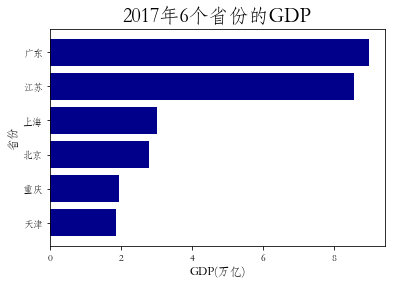

In [6]:
# # #简单条形图
# 对GDP数据进行升序排序
GDP = GDP.sort_values(by ='GDP')
plt.barh(y=range(GDP.shape[0]) ,width=GDP.GDP.values,color='darkblue',align='center',tick_label= GDP.Province.values)
plt.xlabel('GDP(万亿)',fontsize=12)
plt.ylabel('省份',fontsize=12)
plt.title('2017年6个省份的GDP',fontsize=20)
plt.show()

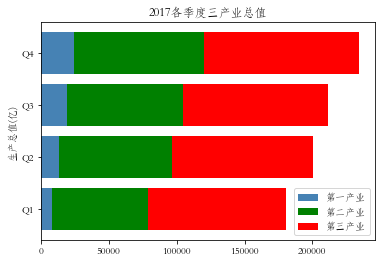

In [7]:
# # #  条形堆叠图
industry_GDP = pd.read_excel('Industry_GDP.xlsx')
temp = pd.crosstab(industry_GDP['Quarter'],industry_GDP['Industry_Type'],values=industry_GDP['GDP'],aggfunc=np.sum)
plt.barh(y= temp.index.values,width= temp['第一产业'],color='steelblue',label='第一产业',tick_label = temp.index.values)
plt.barh(y= temp.index.values,width= temp['第二产业'],left =temp['第一产业'], color='green',label='第二产业',
        tick_label = temp.index.values)
plt.barh(y= temp.index.values,width = temp['第三产业'],left =temp['第一产业'] +  temp['第二产业'],color='red',label='第三产业',
        tick_label = temp.index.values)
plt.ylabel('生产总值(亿)')
plt.title('2017各季度三产业总值')
plt.legend(loc = 'lower right')
plt.show()

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


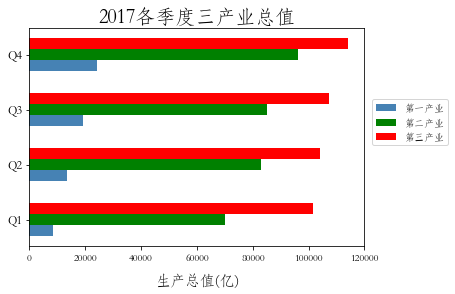

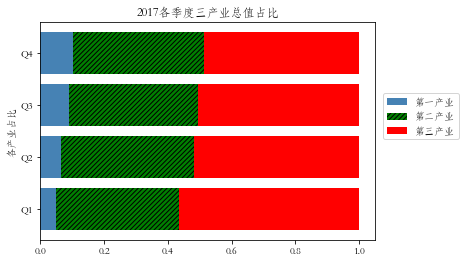

In [8]:
# # # 条形交错图
temp = pd.crosstab(industry_GDP['Quarter'],industry_GDP['Industry_Type'],values=industry_GDP['GDP'],aggfunc=np.sum)
bar_width = 0.2 #设置宽度
fig1 = plt.figure('fig1')
quarter = temp.index.values #取出季度名称
plt.barh(y= np.arange(0,4) ,width= temp['第一产业'],color='steelblue',label='第一产业',height =bar_width)
plt.barh(y= np.arange(0,4) + bar_width,width= temp['第二产业'], color='green',label='第二产业',height = bar_width )
plt.barh(y= np.arange(0,4) + 2*bar_width,width= temp['第三产业'], color='red',label='第三产业',height = bar_width )
plt.yticks(np.arange(4)+0.2,quarter,fontsize=12)
plt.xlabel('生产总值(亿)',fontsize=15,labelpad =10)
plt.title('2017各季度三产业总值',fontsize=20)
# plt.legend(loc = 'lower right')
plt.legend(loc=2, bbox_to_anchor=(1.01,0.7)) #图例显示在外面
# plt.show()
fig1.show()
# # # 条形图堆叠占比
fig2 = plt.figure('fig2')
temp = pd.crosstab(industry_GDP['Quarter'],industry_GDP['Industry_Type'],values=industry_GDP['GDP'],aggfunc=np.sum)
temp = temp.div(temp.sum(1).astype(float), axis=0)
plt.barh(y= temp.index.values,width = temp['第一产业'], color='steelblue',label='第一产业',tick_label = temp.index.values)
plt.barh(y= temp.index.values,width = temp['第二产业'], left=temp['第一产业'], color='green',label='第二产业',
        tick_label = temp.index.values,hatch='/////')
plt.barh(y= temp.index.values,width = temp['第三产业'],left =temp['第一产业'] +  temp['第二产业'],color='red',label='第三产业',
        tick_label = temp.index.values)
plt.ylabel('各产业占比')
plt.title('2017各季度三产业总值占比')
plt.legend(loc=2, bbox_to_anchor=(1.01,0.7)) #图例显示在外面
# plt.show()
fig2.show()


# 直方图

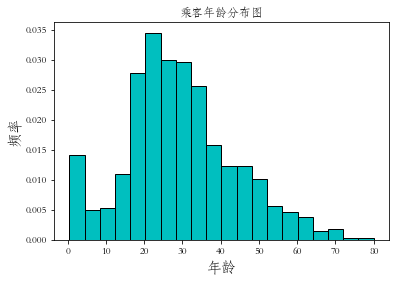

In [9]:
# 读取Titanic数据
Titanic = pd.read_csv('titanic_train.csv')
Titanic.dropna(subset=['Age'], inplace=True)
# 绘制直方图
plt.hist(x = Titanic.Age, bins=20,color='c',edgecolor ='black',density=True)
plt.xlabel('年龄',fontsize =15)
plt.ylabel('频率',fontsize =15)
plt.title('乘客年龄分布图')
plt.show()

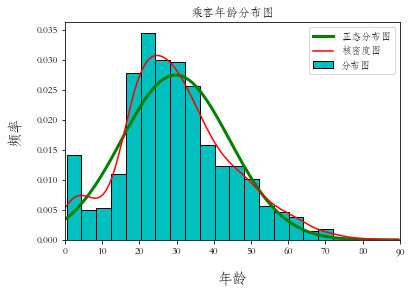

In [10]:
# 添加核密度图和正态分布图
# 定义正态分布概率密度公式
#normfun正态分布函数，mu: 均值，sigma:标准差，pdf:概率密度函数，np.exp():概率密度函数公式
def normfun(x,mu, sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf
mean_x = Titanic.Age.mean()
std_x = Titanic.Age.std()
# x的范围为60-150，以1为单位,需x根据范围调试
x = np.arange(min(Titanic.Age), max(Titanic.Age)+10,1)
# x数对应的概率密度
y = normfun(x, mean_x, std_x)
plt.hist(x=Titanic.Age, bins=20,color='c',edgecolor ='black',label ='分布图',density=True)
plt.plot(x,y, color='g',linewidth = 3,label ='正态分布图') #正态分布图
Titanic['Age'].plot(kind='kde',color='red',xlim=[0,90],label='核密度图')
plt.xlabel('年龄',fontsize =15,labelpad=15)
plt.ylabel('频率',fontsize =15,labelpad=15)
plt.title('乘客年龄分布图')
plt.legend()
plt.show()

# 饼图

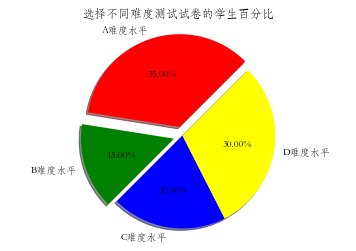

In [11]:
labels =["A难度水平",'B难度水平','C难度水平','D难度水平']
students = [0.35,0.15,0.20,0.30]
colors = ['red','green','blue','yellow']
explode = (0.1,0.1,0,0)
plt.pie(students,explode = explode,labels =labels,autopct='%3.2f%%',startangle=45,shadow=True,
        colors=colors)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.title('选择不同难度测试试卷的学生百分比')
plt.show()


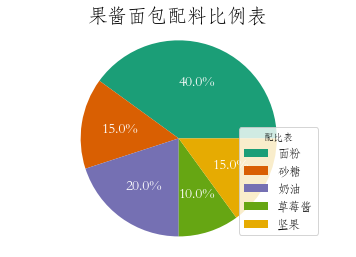

In [12]:
# 带图例的饼图
elements = ['面粉','砂糖','奶油','草莓酱','坚果']
weights =[40,15,20,10,15]
colors = ['#1b9e77', '#d95f02','#7570b3','#66a613','#e6ab02']
wedges,texts,autotexts = plt.pie(weights,autopct='%3.1f%%',textprops=dict(color='w'),colors=colors)
plt.legend(wedges,elements,fontsize=12,title='配比表',loc ='center',
           bbox_to_anchor=(0.7,0.2,0.2,0.2)) # 上下左右的
plt.setp(autotexts,size=15,weight='bold')
plt.setp(texts,size=15)
plt.axis('equal')
plt.title('果酱面包配料比例表',fontsize = 20)
plt.show()

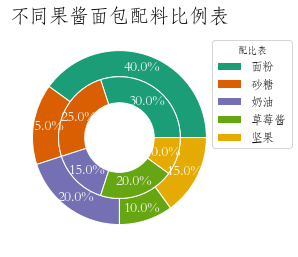

In [13]:
# 绘制内嵌环形饼图
elements = ['面粉','砂糖','奶油','草莓酱','坚果']
weights1 =[40,15,20,10,15]
weights2 =[30,25,15,20,10]
outer_colors = ['#1b9e77', '#d95f02','#7570b3','#66a613','#e6ab02']
inner_colors = ['#1b9e77', '#d95f02','#7570b3','#66a613','#e6ab02']
wedges1,texts1,autotexts1 = plt.pie(weights1,autopct='%3.1f%%', radius =1,   pctdistance=0.85,
                                    colors=outer_colors,textprops=dict(color='w'),wedgeprops=dict(width=0.3,edgecolor='w'))
wedges2,texts2,autotexts2 = plt.pie(weights2,autopct='%3.1f%%', radius =0.7, pctdistance=0.75,
                                    colors=inner_colors,textprops=dict(color='w'),wedgeprops=dict(width=0.3,edgecolor='w'))
plt.legend(wedges1,elements,fontsize=12,title='配比表',loc ='center left',
           bbox_to_anchor =(0.9, 0.2, 0.3, 1))
plt.setp(autotexts1,size=15,weight='bold')
plt.setp(autotexts2,size=15,weight='bold')
plt.setp(texts1,size=12)
plt.title('不同果酱面包配料比例表',fontsize = 20)
plt.show()

# 箱线图

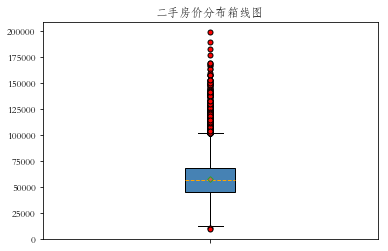

In [15]:
sec_building = pd.read_excel('sec_buildings.xlsx')
plt.boxplot(x=sec_building.price_unit,patch_artist=True,showmeans =True,
            boxprops={'color':'black','facecolor':'steelblue'},
            showfliers=True,
            flierprops={'marker':'o','markerfacecolor':'red','markersize':5},
            meanprops={'marker':'D','markerfacecolor':'indianred','markersize':4},
            medianprops={'linestyle':'--','color':'orange'},labels=[''])
plt.title('二手房价分布箱线图')
plt.show()

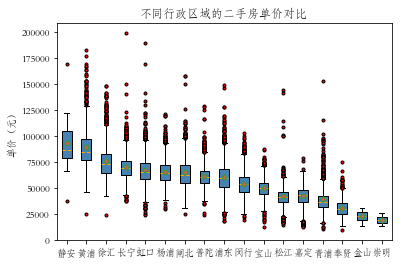

In [16]:
a

# 6 散点图

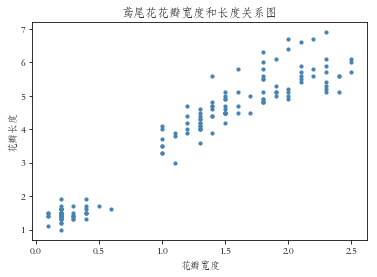

In [17]:
iris = pd.read_csv('iris.csv')
#绘制散点图
plt.scatter(x = iris.Petal_Width,y = iris.Petal_Length,s = 10,
            color ='steelblue')
plt.xlabel('花瓣宽度')
plt.ylabel('花瓣长度')
plt.title('鸢尾花花瓣宽度和长度关系图')
plt.show()

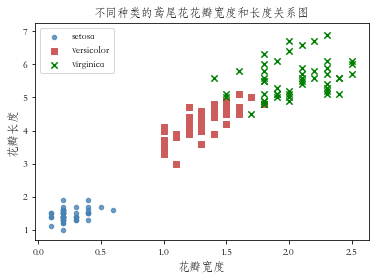

In [18]:
# # # 绘制不同种类的散点图关系
plt.scatter(x = iris.Petal_Width[iris['Species'] =='setosa'],y = iris.Petal_Length[iris['Species'] =='setosa'],s =20,
            color ='steelblue',marker='o',label = 'setosa',alpha=0.8)
plt.scatter(x = iris.Petal_Width[iris['Species'] =='versicolor'],y = iris.Petal_Length[iris['Species'] =='versicolor'],s =30,
            color ='indianred',marker='s',label = 'versicolor')
plt.scatter(x = iris.Petal_Width[iris['Species'] =='virginica'],y = iris.Petal_Length[iris['Species'] =='virginica'],s =40,
            color ='green',marker='x',label = 'virginica')
plt.xlabel('花瓣宽度',fontsize=12)
plt.ylabel('花瓣长度',fontsize=12)
plt.title('不同种类的鸢尾花花瓣宽度和长度关系图')
plt.legend(loc='upper left')
plt.show()

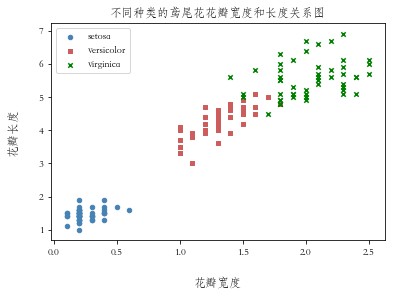

In [19]:
# 使用循环方式
colors_iris = ['steelblue','indianred','green']
sepcies =[ 'setosa','versicolor','virginica']
marker_iris =['o','s','x']
for i in range(0,3):
    plt.scatter(x=iris.Petal_Width[iris['Species'] ==sepcies[i]], y=iris.Petal_Length[iris['Species'] == sepcies[i]], s=20,
                color=colors_iris[i], marker=marker_iris[i], label=sepcies[i])
plt.xlabel('花瓣宽度',fontsize =12, labelpad =20)
plt.ylabel('花瓣长度',fontsize = 12,  labelpad =20)
plt.title('不同种类的鸢尾花花瓣宽度和长度关系图',fontsize =12)
plt.legend(loc='upper left')
plt.show()

# 7 折线图

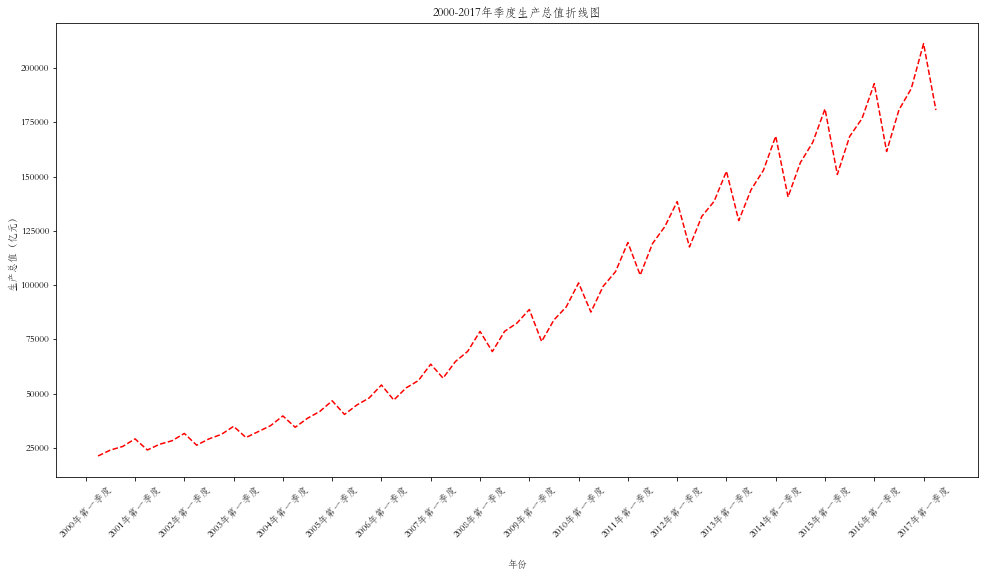

In [21]:
pd.set_option('display.max_columns', 8)
data = np.load('国民经济核算季度数据.npz')
name = data['columns'] ## 提取其中的columns数组，视为数据的标签
values = data['values']## 提取其中的values数组，数据的存在位置
## 绘制折线图
fig = plt.figure(figsize=(16,9)) # 创建画布
ax = fig.add_axes([0.15,0.2,0.8,0.7]) # Axes是画布上的绘图区域，可以添加多块
plt.plot(values[:,0],values[:,2],color = 'r',linestyle = '--')
plt.xlabel('年份',labelpad=20)## 添加横轴标签
plt.ylabel('生产总值（亿元）')## 添加y轴名称
plt.xticks(range(0,70,4),values[range(0,70,4),1],rotation=45)
plt.title('2000-2017年季度生产总值折线图')## 添加图表标题
plt.savefig('2000-2017年季度生产总值折线图.pdf')
plt.show()

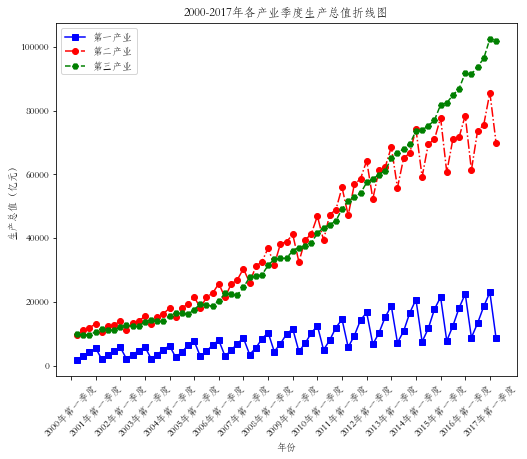

In [22]:
# # # 不同类别
fig =plt.figure(figsize=(8,7)) # 创建画布
ax = fig.add_axes([0.15,0.2,0.8,0.7]) # Axes是画布上的绘图区域
plt.plot(values[:,0],values[:,3],'bs-',
       values[:,0],values[:,4],'ro-.',
       values[:,0],values[:,5],'gH--')## 绘制折线图
plt.xlabel('年份')## 添加横轴标签
plt.ylabel('生产总值（亿元）')## 添加y轴名称
plt.xticks(range(0,70,4),values[range(0,70,4),1],rotation=45)
plt.title('2000-2017年各产业季度生产总值折线图')## 添加图表标题
plt.legend(['第一产业','第二产业','第三产业'])
# plt.savefig('2000-2017年季度各产业生产总值折线图.pdf')
plt.show()

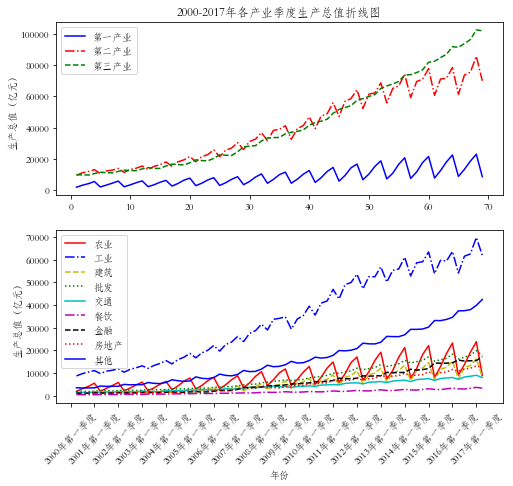

In [23]:
a